#  프로젝트: Face2Emoji 모바일 웹앱`

## data downloanm
- https://www.kaggle.com/ahmedmoorsy/facial-expression

## data set 구성
- emotion / pixels / usage 
    - emotion : 감정번호
    - pixcels: 얼굴 흑백 픽셀값
    - usage : 사용 용도 ( Training, PublicTest, PrivateTest,80%, 10%, 10%)
        

## library import

In [7]:
import numpy as np
import tqdm
import os

from matplotlib import pyplot as plt

import tensorflow as tf

## data import
- privateTest => evaluation data use / etc train data
- pixels column  x / emotion column  y
- pixel size 48x48, grayscals 0 ~255, 흑백


In [4]:
train_x = []
train_y = []
eval_x = []
eval_y = []

csv_path = os.getenv('HOME')+'/aiffel/AIFFEL_LSG/lms/01-EXPLORATION/E13-camera_webapp/data/fer2013.csv'

with open(csv_path) as f:
  for line in tqdm.tqdm(f.read().splitlines()[1:]):
    emotion, pixels, usage = line.split(',')
    
    x = np.array(pixels.split(' ')).astype(float).reshape(48, 48, 1) / 255
    y = int(emotion)

    if usage == 'PrivateTest':
      eval_x.append(x)
      eval_y.append(y)
    else:
      train_x.append(x)
      train_y.append(y)

print('train : {}, eval :{}'.format(len(train_x), len(eval_x)))

100%|██████████| 35887/35887 [00:26<00:00, 1365.18it/s]

train : 32298, eval :3589


Angry


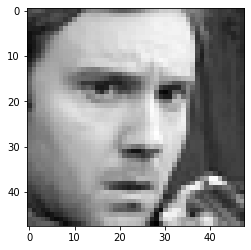

In [6]:
## data check

# y label
LABELS = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

print(LABELS[train_y[0]])
plt.imshow(train_x[0].reshape([48, 48]), cmap='gray')

## MobileNet model 
- keras 에서 제공
- https://keras.io/applications/#mobilenetv2

In [9]:
# model 선언 
model = tf.keras.applications.MobileNetV2(
    input_shape=(48,48,1),
    weights=None,
    classes=7 # emotion label 들...
    
#     alpha=1.0,
#     include_top=True,
#     weights="imagenet",
#     input_tensor=None,
#     pooling=None,
#     classes=1000,
#     classifier_activation="softmax",
#     **kwargs
)

# model.compile
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=[tf.keras.metrics.CategoricalAccuracy()])

#model.fit
model.fit(np.stack(train_x), 
          tf.keras.utils.to_categorical(train_y),
          epochs=100,
          batch_size=512,
          validation_data=(np.stack(eval_x),
                           tf.keras.utils.to_categorical(eval_y)))

Epoch 1/100
64/64 [==============================] - 96s 2s/step - loss: 1.8224 - categorical_accuracy: 0.2491 - val_loss: 1.9313 - val_categorical_accuracy: 0.1744
Epoch 2/100
64/64 [==============================] - 7s 102ms/step - loss: 1.6712 - categorical_accuracy: 0.3325 - val_loss: 1.9194 - val_categorical_accuracy: 0.1744
Epoch 3/100
64/64 [==============================] - 7s 103ms/step - loss: 1.5501 - categorical_accuracy: 0.3931 - val_loss: 1.9120 - val_categorical_accuracy: 0.1744
Epoch 4/100
64/64 [==============================] - 7s 102ms/step - loss: 1.4610 - categorical_accuracy: 0.4336 - val_loss: 1.9145 - val_categorical_accuracy: 0.1744
Epoch 5/100
64/64 [==============================] - 7s 102ms/step - loss: 1.3889 - categorical_accuracy: 0.4671 - val_loss: 1.9184 - val_categorical_accuracy: 0.1744
Epoch 6/100
64/64 [==============================] - 7s 102ms/step - loss: 1.3250 - categorical_accuracy: 0.4963 - val_loss: 1.9212 - val_categorical_accuracy: 0.1744


Epoch 50/100
64/64 [==============================] - 7s 104ms/step - loss: 0.1553 - categorical_accuracy: 0.9451 - val_loss: 2.5242 - val_categorical_accuracy: 0.1744
Epoch 51/100
64/64 [==============================] - 6s 101ms/step - loss: 0.1292 - categorical_accuracy: 0.9563 - val_loss: 2.5874 - val_categorical_accuracy: 0.1744
Epoch 52/100
64/64 [==============================] - 7s 105ms/step - loss: 0.1264 - categorical_accuracy: 0.9559 - val_loss: 2.5977 - val_categorical_accuracy: 0.1744
Epoch 53/100
64/64 [==============================] - 7s 106ms/step - loss: 0.0868 - categorical_accuracy: 0.9717 - val_loss: 2.6483 - val_categorical_accuracy: 0.1744
Epoch 54/100
64/64 [==============================] - 7s 104ms/step - loss: 0.1681 - categorical_accuracy: 0.9421 - val_loss: 2.5890 - val_categorical_accuracy: 0.1744
Epoch 55/100
64/64 [==============================] - 7s 106ms/step - loss: 0.1681 - categorical_accuracy: 0.9430 - val_loss: 2.6022 - val_categorical_accuracy:

Epoch 99/100
64/64 [==============================] - 7s 104ms/step - loss: 0.0600 - categorical_accuracy: 0.9793 - val_loss: 5.4192 - val_categorical_accuracy: 0.4004
Epoch 100/100
64/64 [==============================] - 7s 106ms/step - loss: 0.1132 - categorical_accuracy: 0.9609 - val_loss: 5.2346 - val_categorical_accuracy: 0.4146


## trained model => tensoflow.js 형식으로
- HDF5(.h5) 형식

In [10]:
model_path = os.getenv('HOME')+'/aiffel/AIFFEL_LSG/lms/01-EXPLORATION/E13-camera_webapp/model.h5'
model.save(model_path)